In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [40]:
data = pd.read_csv('./data.csv', sep=',', names=[
    'sex', 'length', 'diameter', 'height',
    'whole weight', 'shucked weight', 'viscera weight', 'shell weight',
    'rings'
])
data['sex'] = data['sex'].map({'M': 'Male', 'F': 'Female', 'I': 'Infant'});

1.

In [41]:
pd.DataFrame({'count': data.value_counts('sex'), '%': (data.value_counts('sex', normalize=True) * 100).round(2)})

,count,%
sex,,
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


2.

In [42]:
data.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

,mean,std,min,25%,50%,75%,max
length,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole weight,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked weight,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera weight,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell weight,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


3. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a bar chart of the counts of occurrences of each category for the qualitative variable in the dataset.

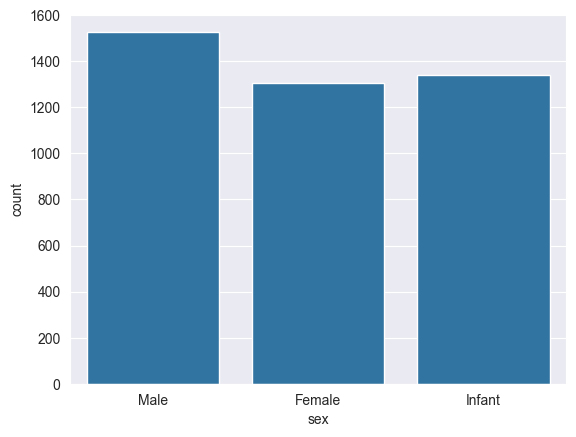

In [43]:
sns.countplot(data, x='sex');

4. Using a package chosen among Matplotlib, Pandas, or Seaborn, create a histogram of each quantitative variable in the dataset. All histograms should be placed in a single figure spanning 4 rows and 2 columns.

In [48]:
data.plot